# Day 3 - Python Workshop for civil engineers:

# Numpy Revisited

In [30]:
import numpy as np

#### Linspace and arange functions
Syntax:<br>
```x = np.linspace(start, stop, num)``` #including start and end point<br> 
```x = np.arange(start, stop, step)```  #including start but excluding end point


In [31]:
np.arange(0, 3, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8])

In [32]:
np.linspace(0, 3, 10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

---

# Plotting Library

#### Importing Library:
```import matplotlib.pyplot as plt```


#### Official Pyplot Tutorial:
https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [33]:
import matplotlib.pyplot as plt

#### Plot Function:
Syntax:
``` plot(x_list, y_list)```


In [34]:
x = [1,2,3,4,5, 6, 7, 8, 9, 10]
y = [3,4,4,5,5, 25, 625, 1000, 50567, 19 * 10**5]


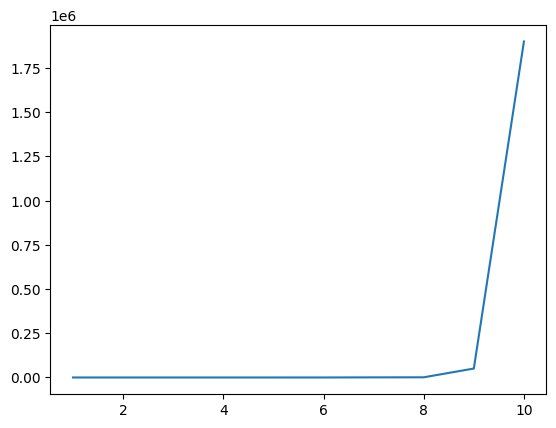

In [35]:
plt.plot(x, y)

#### Logarithmic Plot

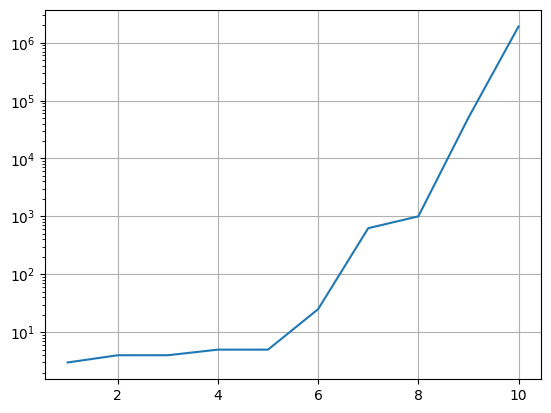

In [38]:
# code for log plot
plt.plot(x,y)
plt.yscale('log')
plt.grid()

#### Histogram:

In [44]:
# Create a virtual die object
die = list(range(1, 6+1, 1))
die

[1, 2, 3, 4, 5, 6]

##### -- Random Library Usage

In [48]:
import random as rd
rd.choice(die)

3

In [59]:
results = []

for x in range(1000):
    results.append(rd.choice(die))


(array([169.,   0., 154.,   0., 173.,   0., 173.,   0., 156., 175.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

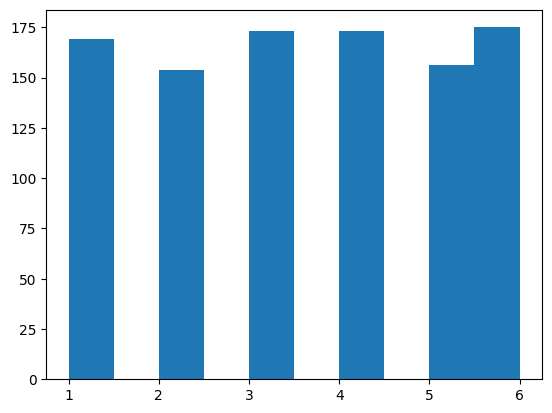

In [60]:
plt.hist(results)

#### Dice 2nd Example: ( Sum of Two Faces)


(array([ 30.,  51.,  96., 115., 148., 158., 121., 114.,  75.,  55.,  37.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

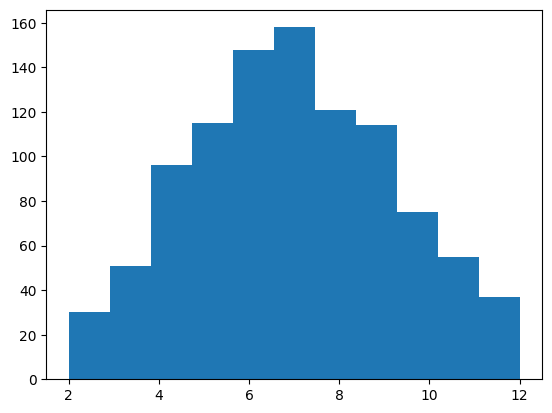

In [91]:
# two dice expreiement
N = 100000

die1 = list(range(1, 6+1, 1))
die2 = list(range(1, 6+1, 1))

results = []

for x in range(1000):
    results.append( rd.choice(die1) + rd.choice(die2) )
# plt.hist(results)

plt.hist(results, bins=11)  #bins means interval


### Pie Chart

In [92]:
results[:20]   #way of printing only intial values of big list.


[10, 8, 9, 6, 7, 2, 8, 6, 7, 6, 9, 8, 11, 5, 10, 6, 9, 5, 8, 8]

In [93]:
freq = []
for i in range(2, 13, 1):
    freq.append(results.count(i))
freq

[30, 51, 96, 115, 148, 158, 121, 114, 75, 55, 37]

In [94]:
values = list( range(2,13,1))
values

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

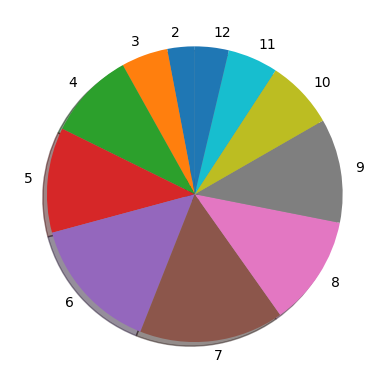

In [95]:
plt.pie(freq, labels = values, shadow = True, startangle=90)
plt.show()

#### Scatter Plot

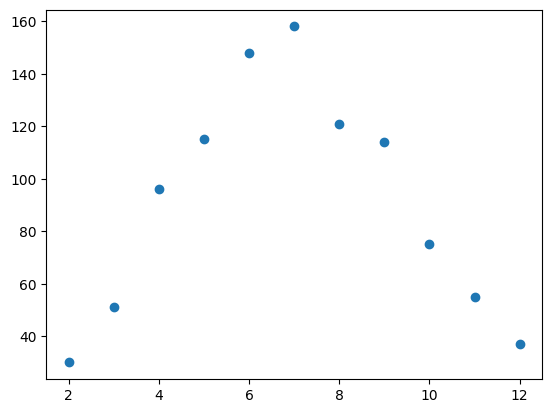

In [96]:
plt.scatter(values, freq)

---

## Example:
Let's consider a function $f(x)$ whose derivative is $f^{\prime}(x)$:
$$
f(x) = \sin(x) + \cos(x)^2 + 1 
$$
$$
f^{\prime}(x) = \cos(x) - 2 \cos(x) \sin(x)
$$
Visualize this function along with it's derivative.

Step 0: Define Function and It's derivative

In [97]:
import numpy as np

def f(x):
    return np.sin(x) + np.cos(x)**2 + 1 

def fprime(x):
    return np.cos(x) - 2 * np.cos(x) * np.sin(x)


Step 1: Visualize the function:

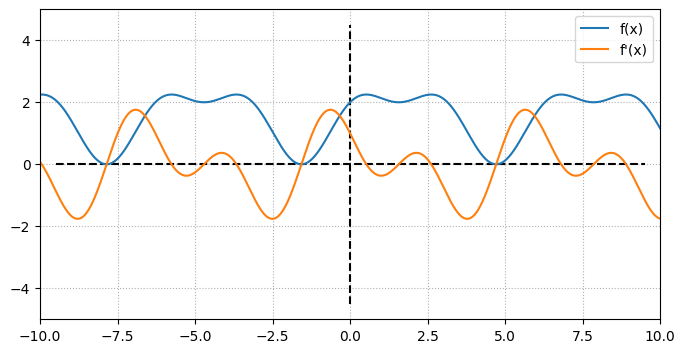

In [118]:
fig, ax = plt.subplots(figsize=(8,8))

#prepare graph
# -10, 10 along x axis:
# -5, 5 along y axis:

ax.grid(linestyle="dotted")
ax.set_aspect("equal")

plt.ylim([-5,5])
plt.xlim([-10,10])

# make axis lines:
ax.plot([-10 +0.5,10 - 0.5],[0,0], linestyle="--", color="k")
ax.plot([0,0],[-5+0.5,5-0.5], linestyle="--", color="k")

# plot functions
x = np.linspace(-10, 10, 100000)
y = f(x)
y2 = fprime(x)

ax.plot(x,y, label = "f(x)")
ax.plot(x,y2, label = "f'(x)")

# outputs
ax.legend()
plt.show()

---

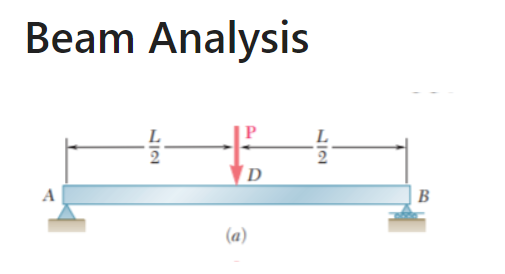

Plot BMD, SFD for given beam:

In [2]:
import sympy as sp
# symbol definition:
l, p, rax, ray, rb = sp.symbols("L, P, R_A_x, R_A_y, R_B")

#Reaction Computation -----------------------------------------------
# Unknown rx: rax, ray, rb

print("make equations:")
# sum fx = 0
display(sp.Eq(rax, 0 ) )

#sum fy = 0
sumy = sp.Eq( -p + ray+ rb ,0)
display(sumy)

# mom about A zero: clockwise moment positive
momA =  sp.Eq( 0+ p*l/2 - rb*l, 0)
display(momA)

values = sp.solve([sumy, momA], [ray,rb])
print("Reaction:")
display(sp.Eq(ray, values[ray]))
display(sp.Eq(rb, values[rb]))


make equations:


Eq(R_A_x, 0)

Eq(-P + R_A_y + R_B, 0)

Eq(L*P/2 - L*R_B, 0)

Reaction:


Eq(R_A_y, P/2)

Eq(R_B, P/2)

In [3]:
# singularity function method:

x = sp.symbols("x")
l = sp.symbols("L", constant = True)

# make shear force expression
sh = values[ray] * sp.SingularityFunction(x, 0, 0) + (-p)* sp.SingularityFunction(x, l/2, 0) + values[rb] * sp.SingularityFunction(x, l, 0)
sh
momfn = sp.Integral(sh,x).doit() + 0
momfn

# assume values:l = 10, P = 2
sh_new = sh.subs([ (l, 10),(p, 2)  ])
display("Shear force", sh_new)
momfn_new = momfn = momfn.subs([ (l, 10),(p, 2)  ])
display("Bending moment", momfn_new)

'Shear force'

SingularityFunction(x, 0, 0) - 2*SingularityFunction(x, 5, 0) + SingularityFunction(x, 10, 0)

'Bending moment'

SingularityFunction(x, 0, 1) - 2*SingularityFunction(x, 5, 1) + SingularityFunction(x, 10, 1)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Transformation of computation values from sympy to numpy

x_val = np.linspace(- 0.0001, 10, 1000)
# x_val

sf = []
for i in x_val:
    sf.append(sh_new.subs(x,i))

bm = []
for i in x_val:
    bm.append(momfn_new.subs(x,i))


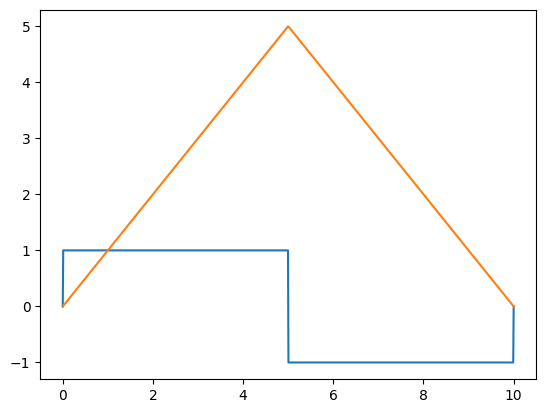

In [8]:
plt.plot(x_val, sf)
plt.plot(x_val, bm)

#### Modifying Apperance:
Changing Color <br>
Example: <br>
```ax.plot(x,y, color="blue", linestyle="--", linewidth=2)```

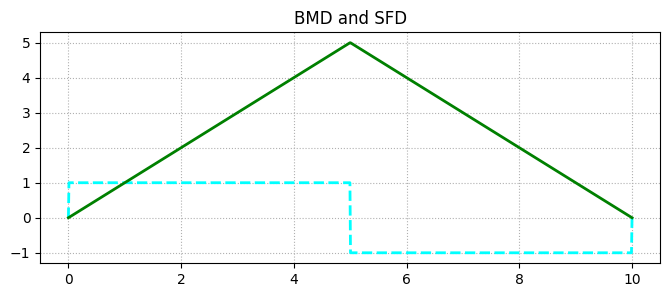

In [9]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(x_val, sf, color="aqua", linestyle="--", linewidth=2)

ax.plot(x_val, bm, color="green", linestyle="solid", linewidth=2)



ax.grid( linestyle = "dotted")


plt.title('BMD and SFD')

plt.show()

#### Plotting More than one graph:

Save Fig Function: <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

In [16]:
# Unpacking list example
a = [1,2,3]
x,y,z = a
print(x)
print(y)

1
2


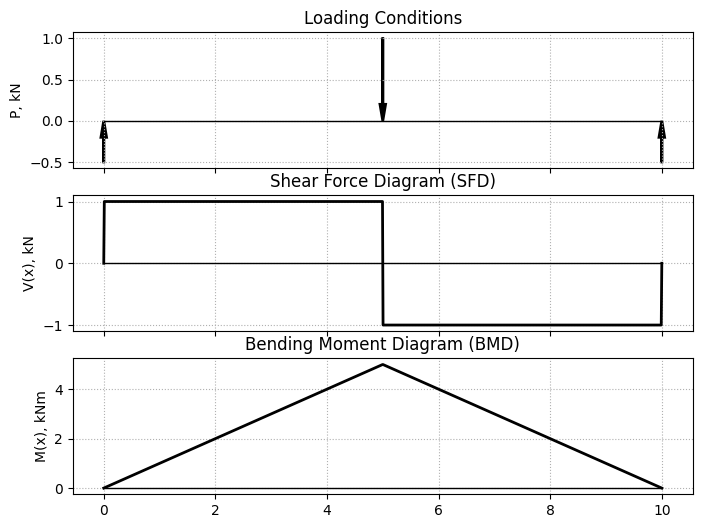

In [49]:
# Loading, SFD and BMD diagram
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize=(8,6))

ax0, ax1, ax2 = axes

# loading:
ax0.plot([0,10],[0,0], linewidth = 1, color = "k")
ax0.set_title("Loading Conditions")
ax0.set_ylabel("P, kN")
ax0.grid(linestyle="dotted")

ax0.arrow(5, 1, 0, -(1 -0.2), linewidth = 2, head_length = .2, head_width = .1, color="k")
ax0.arrow(0, -0.5, 0, 0.5 -0.2 , linewidth = 2, head_length = .2, head_width = .1, color="k")
ax0.arrow(10, -0.5, 0, 0.5 -0.2 , linewidth = 2, head_length = .2, head_width = .1, color="k")

#shear force
ax1.plot([0,10],[0,0], linewidth = 1, color = "k")
ax1.plot(x_val, sf, color="k", linewidth=2)
ax1.set_title("Shear Force Diagram (SFD)")
ax1.set_ylabel("V(x), kN")
ax1.grid(linestyle="dotted")

#bending moment
ax2.plot([0,10],[0,0], linewidth = 1, color = "k")
ax2.plot(x_val, bm, color="k", linewidth=2)
ax2.set_title("Bending Moment Diagram (BMD)")
ax2.set_ylabel("M(x), kNm")
ax2.grid(linestyle="dotted")

plt.savefig("simple_beam_plot.png", bbox_inches = "tight" , dpi = 140)


---